In [117]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Model
from tensorflow.keras.utils import img_to_array
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input


In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [5]:
X_test.shape

(10000, 784)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [71]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                      

In [115]:
conv_index = []
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    conv_index.append(i)
    print(i, layer.name, layer.output.shape)    

1 conv2d_2 (None, 28, 28, 32)
5 conv2d_3 (None, 14, 14, 64)


In [15]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [17]:
history = model.fit(X_train, y_train_ohe, epochs=5, validation_data=(X_test, y_test_ohe), batch_size=300)

Epoch 1/5
200/200 [==============================] - 69s 341ms/step - loss: 0.6621 - accuracy: 0.7596 - val_loss: 0.4494 - val_accuracy: 0.8547
Epoch 2/5
200/200 [==============================] - 78s 390ms/step - loss: 0.4153 - accuracy: 0.8521 - val_loss: 0.3857 - val_accuracy: 0.8632
Epoch 3/5
200/200 [==============================] - 78s 391ms/step - loss: 0.3623 - accuracy: 0.8715 - val_loss: 0.3432 - val_accuracy: 0.8788
Epoch 4/5
200/200 [==============================] - 87s 433ms/step - loss: 0.3307 - accuracy: 0.8814 - val_loss: 0.3163 - val_accuracy: 0.8930
Epoch 5/5
200/200 [==============================] - 95s 475ms/step - loss: 0.3121 - accuracy: 0.8876 - val_loss: 0.3032 - val_accuracy: 0.8942


In [20]:
model.layers[1].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [101]:
img = load_img('sample.png', target_size=(28, 28))

In [105]:
img = tf.image.rgb_to_grayscale(img)

In [107]:
img = img_to_array(img)

In [106]:
img.shape


TensorShape([28, 28, 1])

In [108]:
img = expand_dims(img, axis=0)

In [109]:
feature_maps = model.predict(img)

1/1 [==============================] - 0s 88ms/step


In [110]:
img.shape

(1, 28, 28, 1)

In [111]:


results = [model.layers[1](img)]
results.append(model.layers[5](results[0]))



In [112]:
len(results)

2

In [113]:
results[0].shape

TensorShape([1, 26, 26, 32])

In [114]:
results[1].shape

TensorShape([1, 24, 24, 64])

layer  1
32


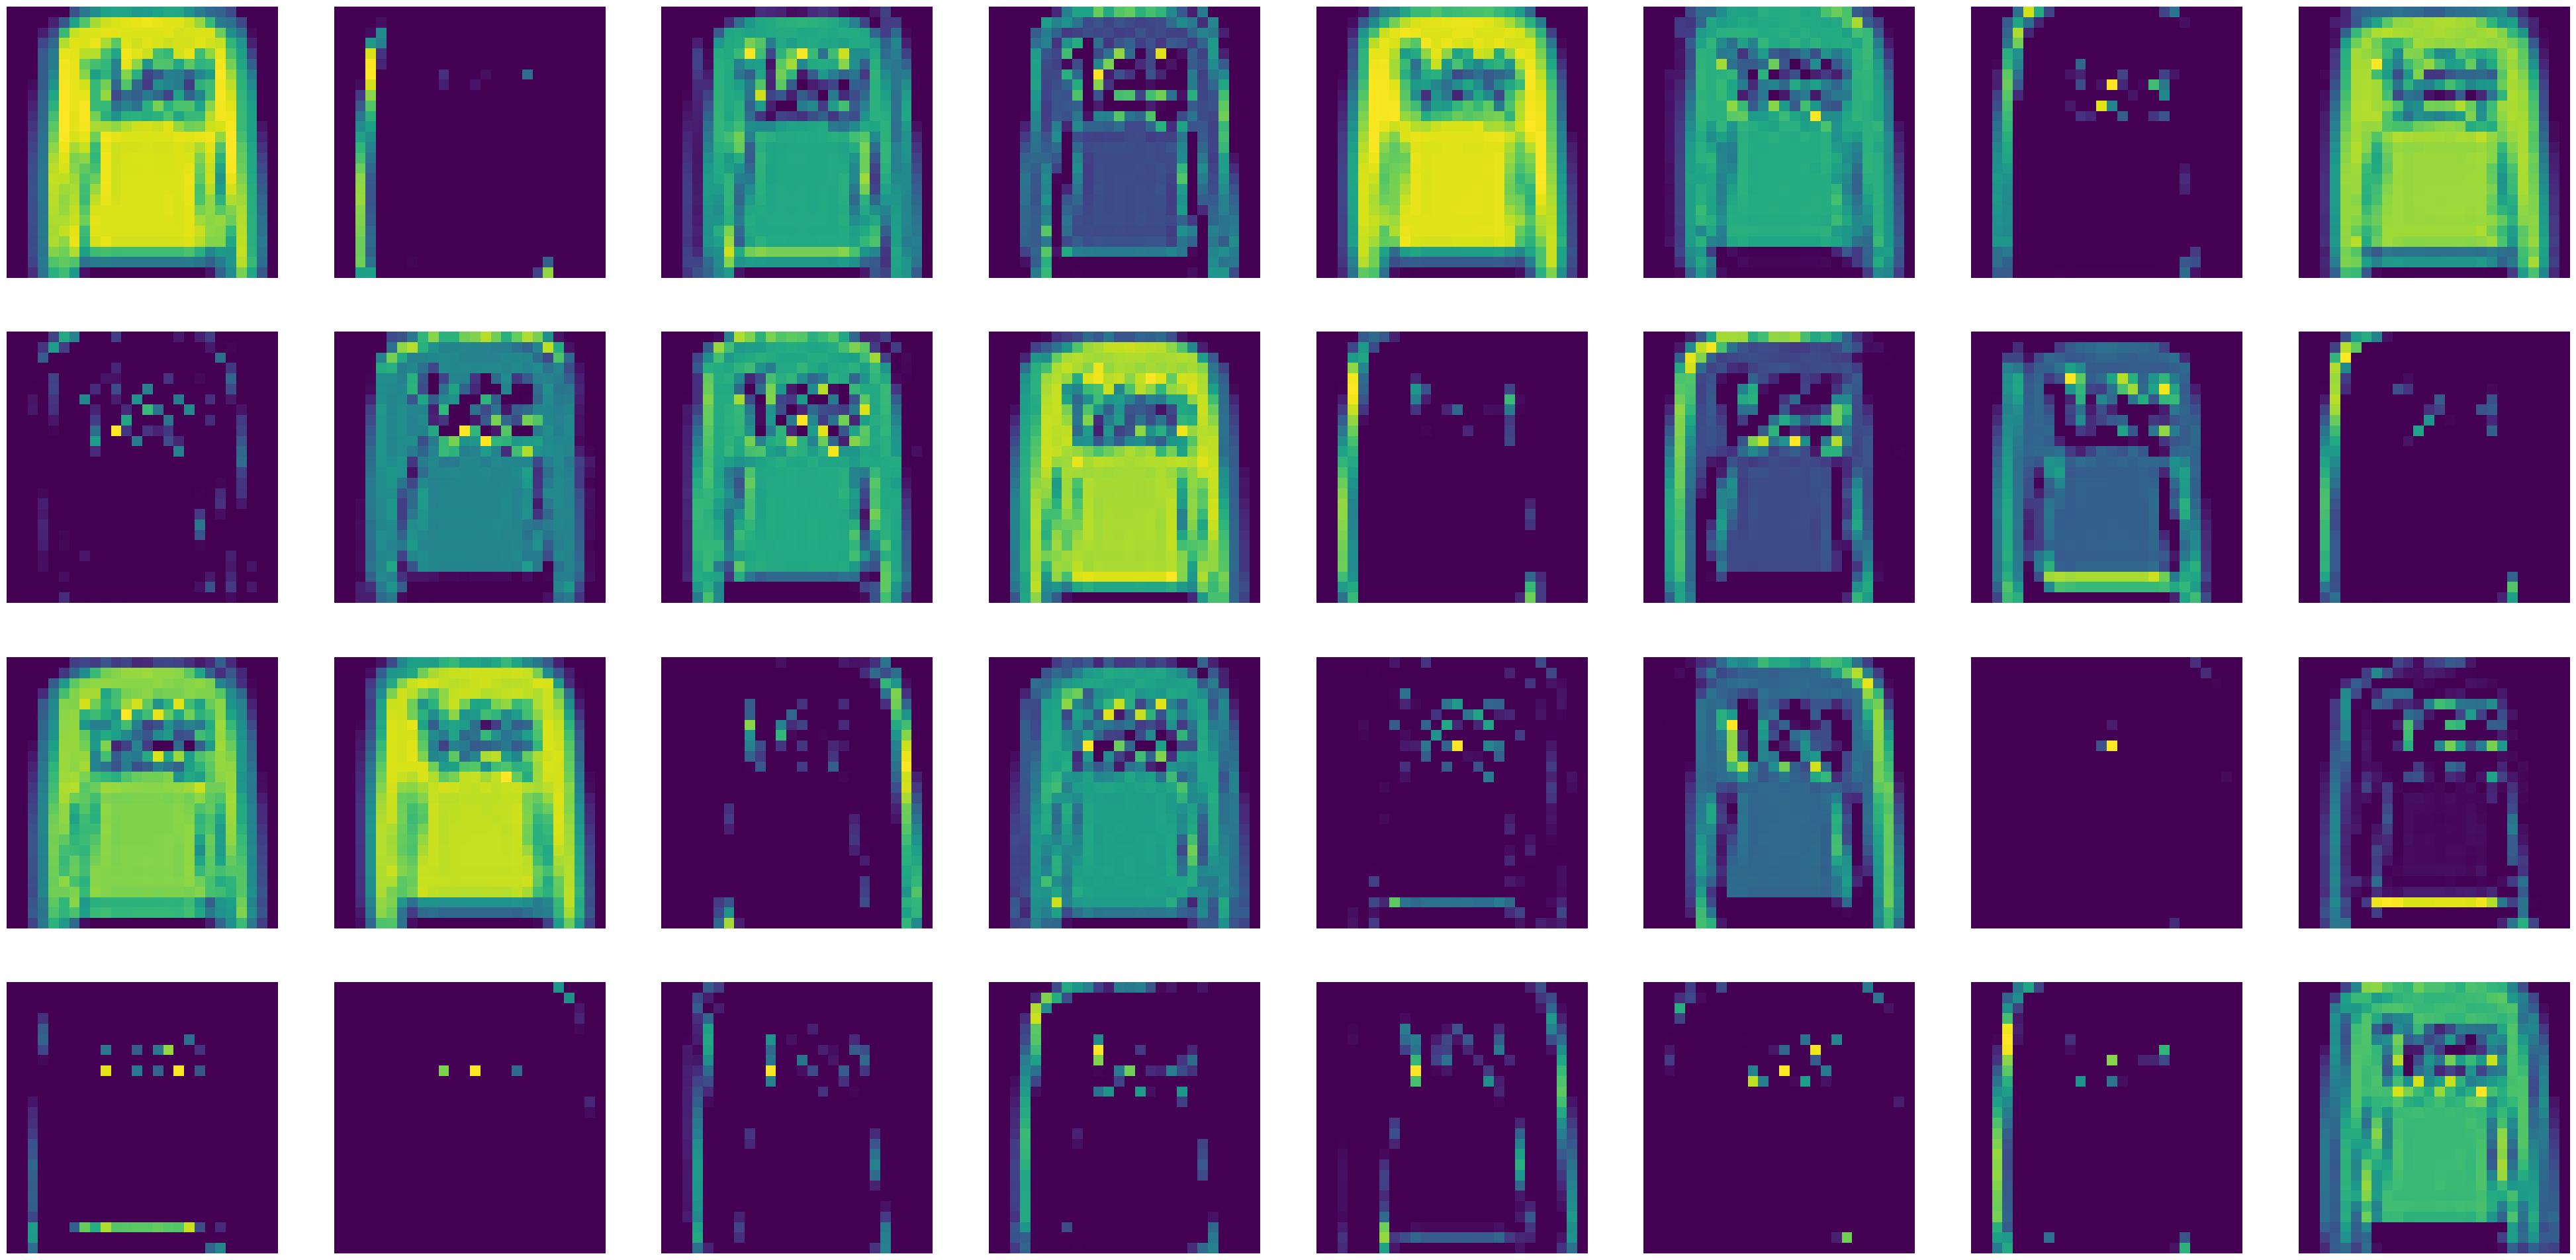

layer  2
64


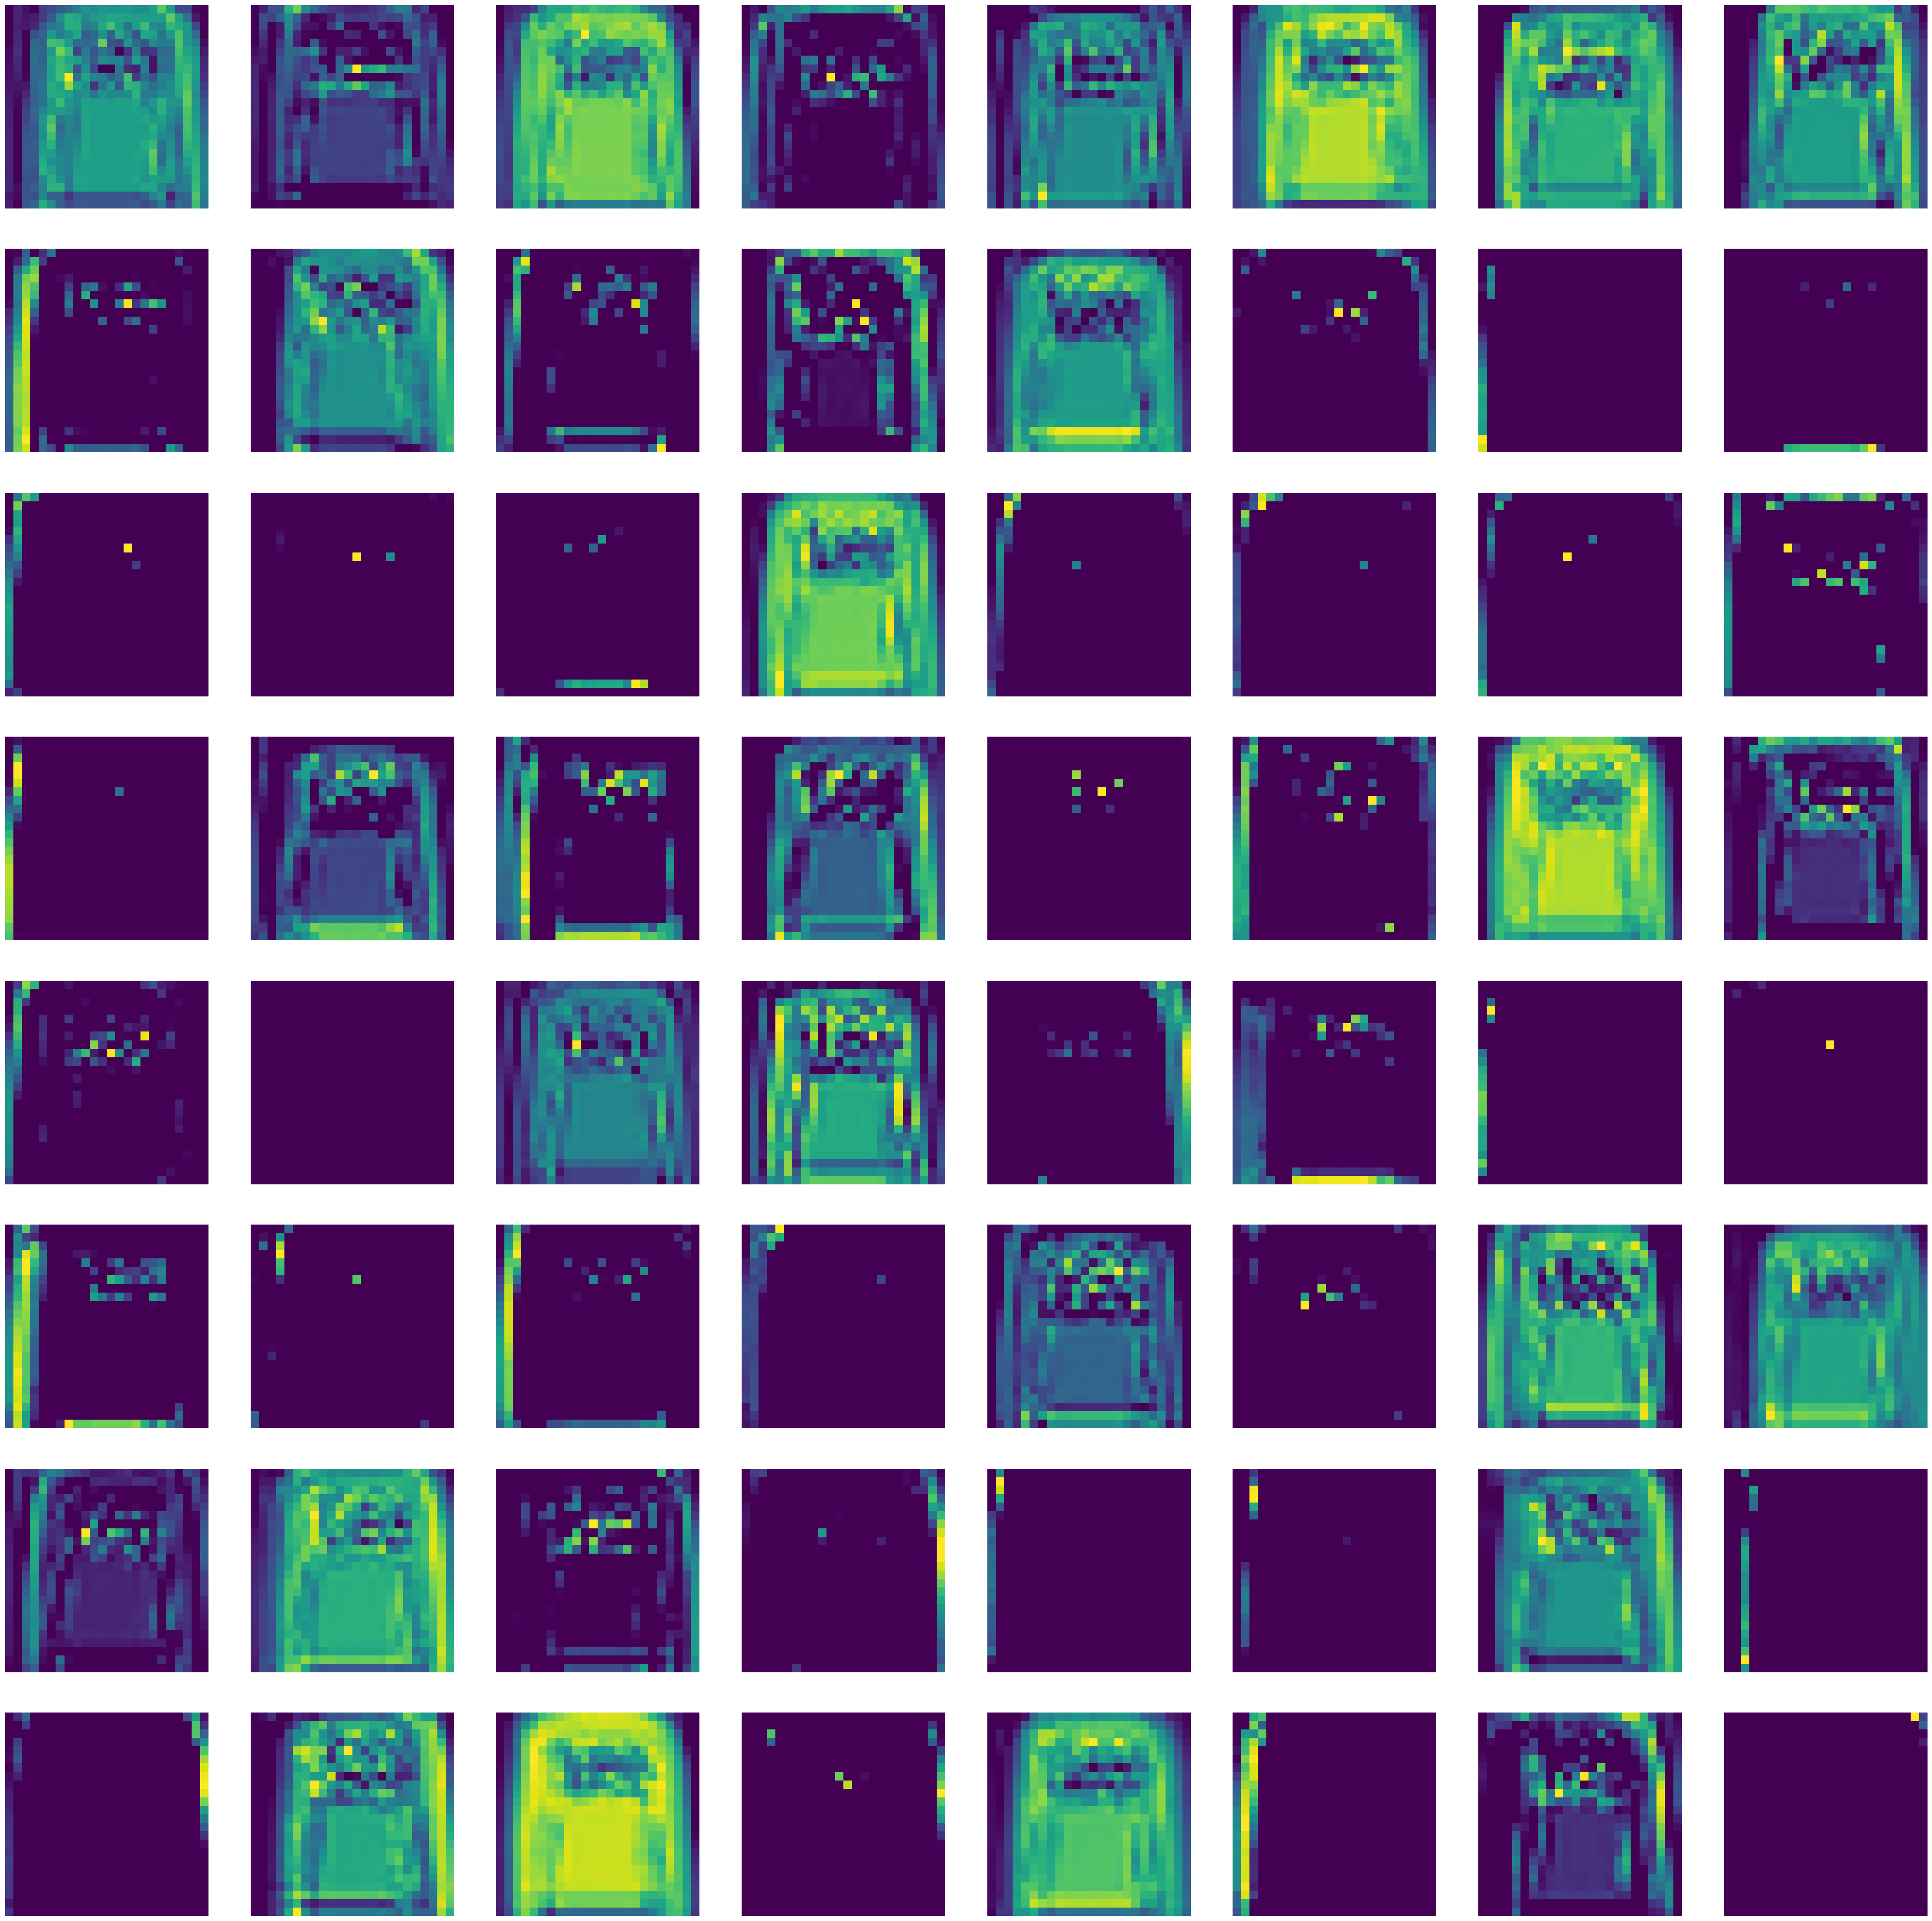

In [156]:


for num_layer in range(len(results)):
    plt.figure(figsize=(50, 50))
    layer_viz = tf.squeeze(results[num_layer], axis=0) 
    print("layer ", num_layer+1)
    print(layer_viz.shape[-1])
    for i in range(layer_viz.shape[-1]):
        f = layer_viz[:, :, i]
        plt.subplot(8, 8, i+1)
        plt.imshow(tf.stop_gradient(f))
        plt.axis("off")
    plt.show()

In [23]:
# MasoudKaviani.ir
# Elyas Najafi